<a href="https://colab.research.google.com/github/Basifrank/HNG12_Codes/blob/main/HNG12_STAGE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 1/productdata.xlsx')

In [ ]:
dataset.head(2)

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.98
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.70


In [ ]:
dataset.shape

(3847, 6)

In [ ]:
dataset.describe()

,PRODUCTID,PRODUCTTYPEID,ProductLength
count,3.847000e+03,3669.000000,3669.000000
mean,1.456557e+06,3932.736986,1150.529020
std,8.666684e+05,3970.908660,2665.897894
min,1.303000e+03,0.000000,1.000000
25%,6.922785e+05,154.000000,507.873000
50%,1.441218e+06,2879.000000,640.000000
75%,2.214798e+06,6337.000000,1023.622046
max,2.999397e+06,13330.000000,96000.000000


In [ ]:
dataset.dtypes

,0
PRODUCTID,int64
TITLE,object
BULLET_POINTS,object
DESCRIPTION,object
PRODUCTTYPEID,float64
ProductLength,float64


In [ ]:
import pandas as pd

# Calculate missing values for each column
missing_values = dataset.isnull().sum()

# Filter columns with missing values greater than zero
missing_columns = missing_values[missing_values > 0]

# Create a DataFrame from the filtered results for better presentation
missing_df = pd.DataFrame({'Column Name': missing_columns.index, 'Missing Values': missing_columns.values})

# Display the DataFrame
print(missing_df)

     Column Name  Missing Values
0  BULLET_POINTS            1591
1    DESCRIPTION            2144
2  PRODUCTTYPEID             178
3  ProductLength             178


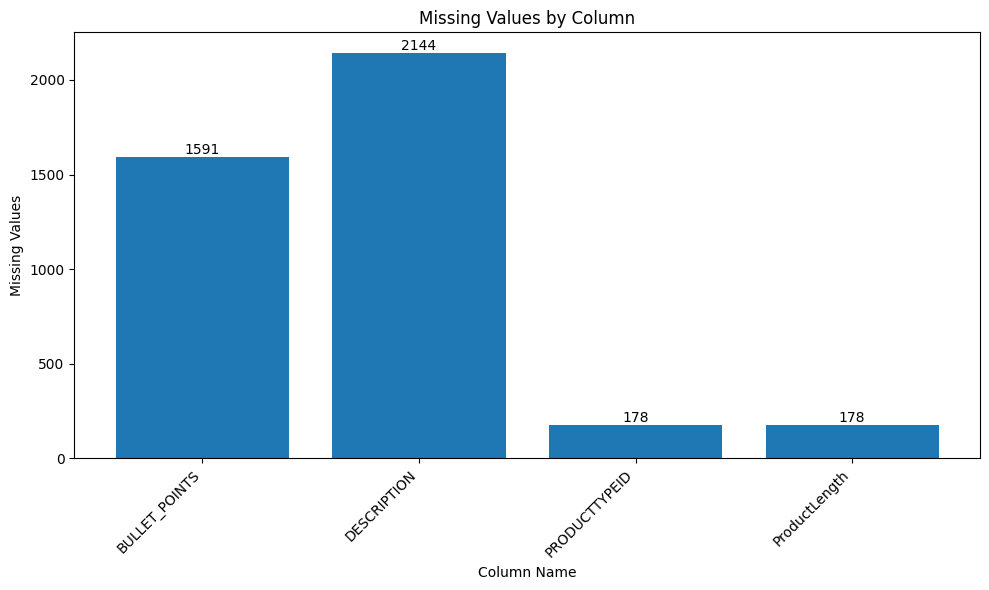

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'missing_df' is already calculated as in the previous response

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(missing_df['Column Name'], missing_df['Missing Values'])

# Add data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval),
             va='bottom', ha='center')  # Adjust label position as needed

# Set labels and title
plt.xlabel('Column Name')
plt.ylabel('Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the chart
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
dataset.columns

Index(['PRODUCTID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCTTYPEID',
       'ProductLength'],
      dtype='object')

In [ ]:
# Renaming columns
dataset.rename(columns={'PRODUCTID': 'product_id','TITLE': 'title', 'BULLET_POINTS': 'bullet_points',
                        'DESCRIPTION': 'description','PRODUCTTYPEID': 'product_type_id',
                        'ProductLength': 'product_length'}, inplace=True)

In [ ]:
dataset.columns

Index(['product_id', 'title', 'bullet_points', 'description',
       'product_type_id', 'product_length'],
      dtype='object')

In [ ]:
dataset.dtypes

,0
product_id,int64
title,object
bullet_points,object
description,object
product_type_id,float64
product_length,float64


In [ ]:
# change product_id and product_type_id columns to object dtype

dataset['product_id'] = dataset['product_id'].astype(str)
dataset['product_type_id'] = dataset['product_type_id'].astype(str)


In [ ]:
dataset.dtypes

,0
product_id,object
title,object
bullet_points,object
description,object
product_type_id,object
product_length,float64


In [ ]:
# add bullet_points and description object columns

dataset['bullet_points_description'] = dataset['bullet_points'].astype(str) + ' ' + dataset['description'].astype(str)


In [ ]:
#drop bullet_points and description columns

dataset.drop(['bullet_points', 'description'], axis=1, inplace=True)

In [ ]:
dataset.head()

,product_id,title,product_type_id,product_length,bullet_points_description
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,1650.0,2125.980000,[LUXURIOUS & APPEALING: Beautiful custom-made ...
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,2755.0,393.700000,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c..."
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,7537.0,748.031495,"[Loud Dual Tone Trumpet Horn, Compatible With ..."
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,2996.0,787.401574,[Made By 95%cotton and 5% Lycra which gives yo...
4,283658,The United Empire Loyalists: A Chronicle of th...,6112.0,598.424000,nan nan


In [ ]:
def extract_words(title):

    pattern = re.compile(r'\b(\D{1,50})|\b(\w+)|(\.$)')
    pattern2 = re.compile(r'.{1,50}')
    match = pattern.search(title)

    if match:  # If pattern matches, return the match
        return match.group()
    else:
        match2 = pattern2.search(title)  # If pattern doesn't match, try pattern2
        if match2:
            return match2.group()
        else:
            return " "  # If neither matches, return empty string

#Apply the function to the 'title' column
#dataset['short_title '] = dataset['title'].apply(extract_words)

# Display the updated DataFrame
#print(dataset[['title', 'extracted_words']].head())

In [ ]:
dataset['short_title'] = dataset['title'].apply(extract_words)

In [ ]:
#dropping duplicate
dataset.drop_duplicates(inplace=True)

In [ ]:
 dataset.isnull().sum()

,0
product_id,0
title,0
product_type_id,0
product_length,89
bullet_points_description,0
short_title,0


In [ ]:
#filling missing data of product_length with average
average_length = dataset['product_length'].mean()
dataset['product_length'].fillna(average_length, inplace=True)

In [ ]:
 dataset.isnull().sum()

,0
product_id,0
title,0
product_type_id,0
product_length,0
bullet_points_description,0
short_title,0


In [ ]:
dataset[["title", "short_title"]]

,title,short_title
0,ArtzFolio Tulip Flowers Blackout Curtain for D...,ArtzFolio Tulip Flowers Blackout Curtain for D...
1,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,Marks & Spencer Girls' Pyjama Sets T
2,PRIKNIK Horn Red Electric Air Horn Compressor ...,PRIKNIK Horn Red Electric Air Horn Compressor ...
3,ALISHAH Women's Cotton Ankle Length Leggings C...,ALISHAH Women's Cotton Ankle Length Leggings C...
4,The United Empire Loyalists: A Chronicle of th...,The United Empire Loyalists: A Chronicle of th...
...,...,...
3651,Generic Chiffon printed dupatta with Golden do...,Generic Chiffon printed dupatta with Golden do...
3652,CAUGHT IN THE ACT (Loveswept),CAUGHT IN THE ACT (Loveswept)
3653,GlobalNicheÂ® Leather Car Key Case Cover for f...,GlobalNicheÂ® Leather Car Key Case Cover for f...
3654,"The Mountain Bigfoot Adult T-Shirt, Brown, Small","The Mountain Bigfoot Adult T-Shirt, Brown, Small"


In [ ]:
dataset.head()

,product_id,title,product_type_id,product_length,bullet_points_description,short_title
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,1650.0,2125.980000,[LUXURIOUS & APPEALING: Beautiful custom-made ...,ArtzFolio Tulip Flowers Blackout Curtain for D...
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,2755.0,393.700000,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",Marks & Spencer Girls' Pyjama Sets T
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,7537.0,748.031495,"[Loud Dual Tone Trumpet Horn, Compatible With ...",PRIKNIK Horn Red Electric Air Horn Compressor ...
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,2996.0,787.401574,[Made By 95%cotton and 5% Lycra which gives yo...,ALISHAH Women's Cotton Ankle Length Leggings C...
4,283658,The United Empire Loyalists: A Chronicle of th...,6112.0,598.424000,nan nan,The United Empire Loyalists: A Chronicle of th...


In [ ]:
dataset.columns

Index(['product_id', 'title', 'product_type_id', 'product_length',
       'bullet_points_description', 'short_title'],
      dtype='object')

In [ ]:
dataset.dtypes

,0
product_id,object
title,object
product_type_id,object
product_length,float64
bullet_points_description,object
short_title,object


In [ ]:
dataset.shape

(3630, 6)

In [ ]:
dataset.to_csv('cleaned_data.csv', index=False)

In [ ]:
title = str(32) + str(",") + str(33)
title

'32,33'